<h1 align = 'center'> Neural Networks Demystified </h1>
<h2 align = 'center'> Part 4: Backpropagation </h2>


<h4 align = 'center' > @stephencwelch </h4>

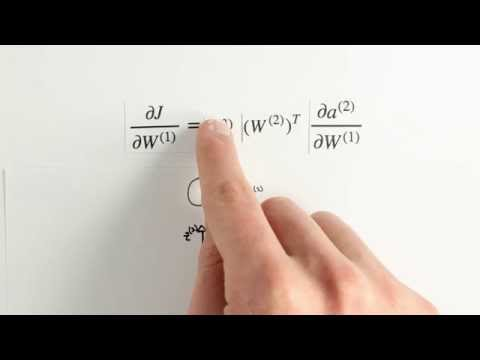

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('GlcnxUlrtek')

<h3 align = 'center'> Variables </h3>

|Code Symbol | Math Symbol | Definition | Dimensions
| :-: | :-: | :-: | :-: |
|X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
|y |$$y$$|target data|(numExamples, outputLayerSize)|
|W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
|W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
|z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
|a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
|z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
|J | $$J$$ | Cost | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Partial derivative of cost with respect to $z^{(3)}$ | (numExamples,outputLayerSize)|
|dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Partial derivative of cost with respect to $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
|dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$|Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$|(numExamples, hiddenLayerSize)|
|dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Partial derivative of cost with respect to $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
|delta2|$$\delta^{(2)}$$|Backpropagating Error 2|(numExamples,hiddenLayerSize)|
|delta3|$$\delta^{(3)}$$|Backpropagating Error 1|(numExamples,outputLayerSize)|

Last time, we decided to use gradient descent to train our Neural Network, so it could make better predictions of your score on a test based on how many hours you slept, and how many hours you studied the night before. To perform gradient descent, we need an equation and some code for our gradient, dJ/dW.  

Our weights, W, are spread across two matrices, W1 and W2. We’ll separate our dJ/dW computation in the same way, by computing dJdW1 and dJdW2 independently. We should have just as many gradient values as weight values, so when we’re done, our matrices dJdW1 and dJdW2 will be the same size as W1 and W2.

$$
\frac{\partial J}{\partial W^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

Let’s work on dJdW2 first. The sum in our cost function adds the error from each example to create our overall cost. We’ll take advantage of the sum rule in differentiation, which says that the derivative of the sums equals the sum of the derivatives. We can move our sigma outside and just worry about the derivative of the inside expression first. 

$$
\frac{\partial J}{\partial W^{(2)}} = \sum \frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial W^{(2)}}
$$

To keep things simple, we’ll temporarily forget about our summation. Once we’ve computed dJdW for a single example, we’ll add all our individual derivative terms together. 

We can now evaluate our derivative. The power rule tells us to bring down our exponent, 2, and multiply. To finish our derivative, we’ll need to apply the chain rule. 

The chain rule tells us how to take the derivative of a function inside of a function, and generally says we take the derivative of the outside function and then multiply it by the derivative of the inside function. 

One way to express the chain rule is as the product of derivatives, this will come in very handy as we progress through backpropagation. In fact, a better name for backpropagation might be: don’t stop doing the chain rule. ever. 

We’ve taken the derivative of the outside of our cost function - now we need to multiply it by the derivative of the inside.

Y is just our test scores, which won’t change, so the derivative of y, a constant, with respect to W two is 0! yHat, on the other hand, does change with respect to W two, so we’ll apply the chain rule and multiply our results by minus dYhat/dW2. 

$$
\frac{\partial J}{\partial W^{(2)}} = -(y-\hat{y}) \frac{\partial \hat{y}}{\partial W^{(2)}}
$$

We now need to think about the derivative of yHat with respect to W2. Equation 4 tells us that yHat is our activation function of z3, so we it will be helpful to apply the chain rule again to break dyHat/dW2 into dyHat/dz3 times dz3/dW2. 

$$
\frac{\partial J}{\partial W^{(2)}} = 
-(y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}  
\frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

To find the rate of change of yHat with respect to z3, we need to differentiate our sigmoid activation function with respect to z. 

$$
f(z) = \frac{1}{1+e^{-z}}
$$

$$
f^\prime(z) = \frac{e^{-z}}{(1+e^{-z})^2}
$$

Now is a good time to add a new python method for the derivative of our sigmoid function, sigmoid Prime. Our derivative should be the largest where our sigmoid function is the steepest, at the value z equals zero.

In [4]:
%pylab inline
#Import code from last time
from partTwo import *

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'partTwo'

In [ ]:
def sigmoid(z):
     #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))

In [ ]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

In [ ]:
testValues = np.arange(-5,5,0.01)
plot(testValues, sigmoid(testValues), linewidth=2)
plot(testValues, sigmoidPrime(testValues), linewidth=2)
grid(1)
legend(['sigmoid', 'sigmoidPrime'])

We can now replace dyHat/dz3 with f prime of z 3.

$$
\frac{\partial z^{(3)}}{\partial W^{(2)}}= 
-(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(2)}}
$$

Our final piece of the puzzle is dz3dW2, this term represents the change of z, our third layer activity, with respect to the weights in the second layer.

Z three is the matrix product of our activities, a two, and our weights, w two. The activities from layer two are multiplied by their correspond weights and added together to yield z3. If we focus on a single synapse for a moment, we see a simple linear relationship between W and z, where a is the slope. So for each synapse, dz/dW(2) is just the activation, a on that synapse!

$$
z^{(3)} = a^{(2)}W^{(2)} \tag{3}\\
$$

Another way to think about what the calculus is doing here is that it is “backpropagating” the error to each weight, by multiplying by the activity on each synapses, the weights that contribute more to the error will have larger activations, and yield larger dJ/dW2 values, and those weights will be changed more when we perform gradient descent. 

We need to be careful with our dimensionality here, and if we’re clever, we can take care of that summation we got rid of earlier. 

The first part of our equation, y minus yHat is of the same dimension as our output data, 3 by 1. 

F prime of z three is of the same size, 3 by 1, and our first operation is scalar multiplication. Our resulting 3 by 1 matrix is referred to as the backpropagating error, delta 3.

We determined that dz3/dW2 is equal to the activity of each synapse. Each value in delta 3 needs to be multiplied by each activity. We can achieve this by transposing a2 and matrix multiplying by delta3. 

$$
\frac{\partial J}{\partial W^{(2)}} = 
(a^{(2)})^T\delta^{(3)}\tag{6}
$$

$$
\delta^{(3)} = -(y-\hat{y}) f^\prime(z^{(3)}) 
$$

What’s cool here is that the matrix multiplication also takes care of our earlier omission – it adds up the dJ/dW terms across all our examples. 

Another way to think about what’s happening here is that is that each example our algorithm sees has a certain cost and a certain gradient. The gradient with respect to each example pulls our gradient descent algorithm in a certain direction. It's like every example gets a vote on which way is downhill, and when we perform batch gradient descent we just add together everyone’s vote, call it downhill, and move in that direction.

We’ll code up our gradients in python in a new method, cost function prime. Numpy’s multiply method performs element-wise multiplication, and the dot method performs matrix multiplication.

In [ ]:
# Part of NN Class (won't work alone, needs to be included in class as 
# shown in below and in partFour.py):

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

We have one final term to compute: dJ/dW1. The derivation begins the same way, computing the derivative through our final layer: first dJ/dyHat, then dyHat/dz3, and we called these two taken together form our backpropagating error, delta3. We now take the derivative “across” our synapses, this is a little different from out job last time, computing the derivative with respect to the weights on our synapses. 

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = (y-\hat{y})
\frac{\partial \hat{y}}{\partial z^{(3)}}
\frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = -(y-\hat{y}) f^\prime(z^{(3)}) \frac{\partial z^{(3)}}{\partial W^{(1)}}
$$

$$
\frac{\partial z^{(3)}}{\partial W^{(1)}} = \frac{\partial z^{(3)}}{\partial a^{(2)}}\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$


There’s still a nice linear relationship along each synapse, but now we’re interested in the rate of change of z(3) with respect to a(2). Now the slope is just equal to the weight value for that synapse. We can achieve this mathematically by multiplying by W(2) transpose. 

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial W^{(1)}}
$$

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
\frac{\partial a^{(2)}}{\partial z^{(2)}}
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Our next term to work on is da(2)/dz(2) – this step is just like the derivative across our layer 3 neurons, so we can just multiply by f prime(z2). 

$$
\frac{\partial J}{\partial W^{(1)}} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
\frac{\partial z^{(2)}}{\partial W^{(1)}}
$$

Our final computation here is dz2/dW1. This is very similar to our dz3/dW2 computation, there is a simple linear relationship on the synapses between z2 and w1, in this case though, the slope is the input value, X. We can use the same technique as last time by multiplying by X transpose, effectively applying the derivative and adding our dJ/dW1’s together across all our examples. 

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}
\delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

Or:

$$
\frac{\partial J}{\partial W^{(1)}} = 
X^{T}\delta^{(2)} \tag{7}
$$

Where:

$$
\delta^{(2)} = \delta^{(3)} 
(W^{(2)})^{T}
f^\prime(z^{(2)})
$$

All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together. 

In [ ]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

So how should we change our W’s to decrease our cost? We can now compute dJ/dW, which tells us which way is uphill in our 9 dimensional optimization space. 

In [ ]:
NN = Neural_Network()

In [ ]:
cost1 = NN.costFunction(X,y)

In [ ]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [ ]:
dJdW1

In [ ]:
dJdW2

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained. 

In [ ]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [ ]:
print cost1, cost2

In [ ]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [ ]:
print cost2, cost3

Next time we’ll perform numerical gradient checking check to make sure our math is correct. 